In [2]:

import csv

# Bonus calculator function
def calculate_bonus(orders):
    if orders > 50:
        return 500
    elif orders > 30:
        return 200
    else:
        return 0

# Ask how many pickers
num = int(input("How many pickers today? "))
pickers = []

# Collect data
for i in range(num):
    print(f"\n--- Picker {i+1} ---")
    name = input("Name: ")
    orders = int(input("Orders Packed: "))
    hours = float(input("Hours Worked: "))
    break_time = float(input("Break Time: "))

    eff_hours = hours - break_time
    efficiency = orders / eff_hours if eff_hours > 0 else 0
    bonus = calculate_bonus(orders)

    picker_report = {
        "name": name,
        "orders": orders,
        "efficiency": round(efficiency, 2),
        "bonus": bonus
    }

    pickers.append(picker_report)

# Save to CSV
filename = "picker_report.csv"
with open(filename, mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=["name", "orders", "efficiency", "bonus"])
    writer.writeheader()
    writer.writerows(pickers)

print(f"\n📁 Picker report saved to {filename} ✅")

# Print summary
print("\n===== Daily Summary =====")
for p in pickers:
    print(f"{p['name']} - {p['orders']} orders - {p['efficiency']} orders/hr - ₹{p['bonus']} bonus")


How many pickers today? 3

--- Picker 1 ---
Name: srujan
Orders Packed: 52
Hours Worked: 8
Break Time: 0.5

--- Picker 2 ---
Name: ravi
Orders Packed: 30
Hours Worked: 7.5
Break Time: 1

--- Picker 3 ---
Name: divya
Orders Packed: 45
Hours Worked: 8
Break Time: 0.5

📁 Picker report saved to picker_report.csv ✅

===== Daily Summary =====
srujan - 52 orders - 6.93 orders/hr - ₹500 bonus
ravi - 30 orders - 4.62 orders/hr - ₹0 bonus
divya - 45 orders - 6.0 orders/hr - ₹200 bonus


## 📊 Milestone 5: Visualizing Picker Performance

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load picker_report.csv
df = pd.read_csv("picker_report.csv")

# View the data
print(df)

     name  orders  efficiency  bonus
0  srujan      52        6.93    500
1    ravi      30        4.62      0
2   divya      45        6.00    200


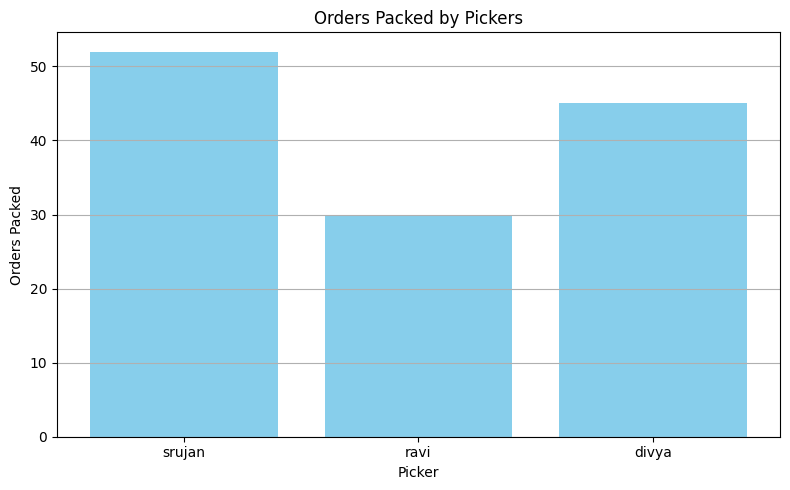

In [4]:
# Bar chart - Orders Packed per Picker
plt.figure(figsize=(8, 5))
plt.bar(df["name"], df["orders"], color="skyblue")
plt.title("Orders Packed by Pickers")
plt.xlabel("Picker")
plt.ylabel("Orders Packed")
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("orders_bar_chart.png")
plt.show()


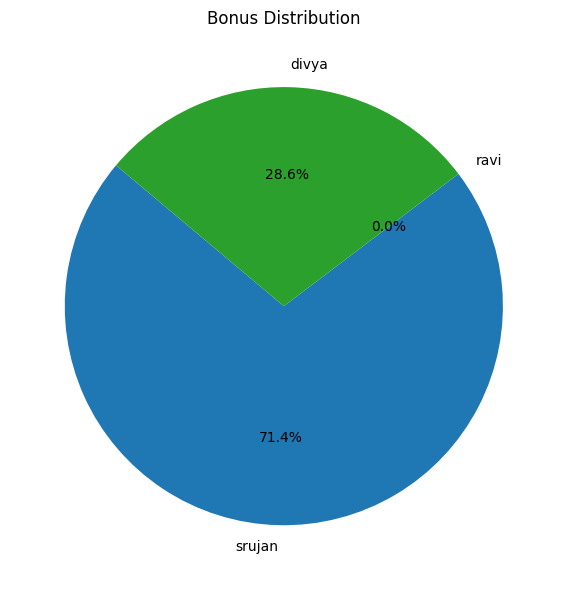

In [5]:
# Pie chart - Bonus distribution
plt.figure(figsize=(6, 6))
plt.pie(df["bonus"], labels=df["name"], autopct='%1.1f%%', startangle=140)
plt.title("Bonus Distribution")
plt.tight_layout()
plt.savefig("bonus_pie_chart.png")
plt.show()


## 📊 Milestone 6 – CSV Analysis with pandas

In [6]:
import pandas as pd

df = pd.read_csv("picker_report.csv")
print("Raw data:\n", df)

# Quick stats
display(df.describe())

# Top performers by orders
top_orders = df.sort_values(by="orders", ascending=False)
print("\n🏆 Top by orders:\n", top_orders)

# Top performers by efficiency
top_eff = df.sort_values(by="efficiency", ascending=False)
print("\n⚡ Top by efficiency:\n", top_eff)

# Total bonus
total_bonus = df["bonus"].sum()
print("\n💰 Total bonus paid:", total_bonus)

# Average efficiency
avg_eff = df["efficiency"].mean()
print("📈 Average efficiency:", round(avg_eff, 2), "orders/hour")

# High performers (efficiency > 5)
high_perf = df[df["efficiency"] > 5]
print("\n🔥 High performers (eff > 5):\n", high_perf)


Raw data:
      name  orders  efficiency  bonus
0  srujan      52        6.93    500
1    ravi      30        4.62      0
2   divya      45        6.00    200


,orders,efficiency,bonus
count,3.000000,3.000000,3.000000
mean,42.333333,5.850000,233.333333
std,11.239810,1.162282,251.661148
min,30.000000,4.620000,0.000000
25%,37.500000,5.310000,100.000000
50%,45.000000,6.000000,200.000000
75%,48.500000,6.465000,350.000000
max,52.000000,6.930000,500.000000



🏆 Top by orders:
      name  orders  efficiency  bonus
0  srujan      52        6.93    500
2   divya      45        6.00    200
1    ravi      30        4.62      0

⚡ Top by efficiency:
      name  orders  efficiency  bonus
0  srujan      52        6.93    500
2   divya      45        6.00    200
1    ravi      30        4.62      0

💰 Total bonus paid: 700
📈 Average efficiency: 5.85 orders/hour

🔥 High performers (eff > 5):
      name  orders  efficiency  bonus
0  srujan      52        6.93    500
2   divya      45        6.00    200
